In [ ]:
# from http://www.patricklamle.com/Tutorials/Decision%20tree%20python/tuto_decision%20tree.html

In [68]:
import random, string

def generate_new_data(n, m):
    
    my_data = []
    attributes = []
    
    for i in range(m):
        attributes.append([])
        name_length = 8
        for j in range(m):
            hash = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(name_length))
            attributes[i].append(hash)
            
    
    for i in range(n):
        new_entry = []
        for j in range(m):
            new_entry.append(random.choice(attributes[j]))
        my_data.append(new_entry)
        
    return my_data

In [70]:
print(generate_new_data(2, 3))

[['Y8LQRVPW', '1ZPAT73V', 'JRQZ70FV'], ['Y8LQRVPW', '1ZPAT73V', 'TX8VNTYE']]


In [2]:
# Divides a set on a specific column. Can handle numeric or nominal values
def divideset(rows,column,value):
   # Make a function that tells us if a row is in the first group (true) or the second group (false)
   split_function=None
   if isinstance(value,int) or isinstance(value,float): # check if the value is a number i.e int or float
      split_function=lambda row:row[column]>=value
   else:
      split_function=lambda row:row[column]==value
   
   # Divide the rows into two sets and return them
   set1=[row for row in rows if split_function(row)]
   set2=[row for row in rows if not split_function(row)]
   return (set1,set2)

In [5]:
# Create counts of possible results (the last column of each row is the result)
def uniquecounts(rows):
   results={}
   for row in rows:
      # The result is the last column
      r=row[len(row)-1]
      if r not in results: results[r]=0
      results[r]+=1
   return results

In [8]:

# Entropy is the sum of p(x)log(p(x)) across all 
# the different possible results
def entropy(rows):
   from math import log
   log2=lambda x:log(x)/log(2)  
   results=uniquecounts(rows)
   # Now calculate the entropy
   ent=0.0
   for r in results.keys():
      p=float(results[r])/len(rows)
      ent=ent-p*log2(p)
   return ent

In [11]:
class decisionnode:
  def __init__(self,col=-1,value=None,results=None,tb=None,fb=None):
    self.col=col
    self.value=value
    self.results=results
    self.tb=tb
    self.fb=fb

In [95]:
def buildtree(rows,scoref=entropy): #rows is the set, either whole dataset or part of it in the recursive call, 
                                    #scoref is the method to measure heterogeneity. By default it's entropy.

  print('dataset size: ' + str(len(rows)))

  if len(rows)==0: return decisionnode() #len(rows) is the number of units in a set
  current_score=scoref(rows)

  # Set up some variables to track the best criteria
  best_gain=0.0
  best_criteria=None
  best_sets=None
  
  column_count=len(rows[0])-1   #count the # of attributes/columns. 
                                #It's -1 because the last one is the target attribute and it does not count.
  for col in range(0,column_count):
    # Generate the list of all possible different values in the considered column
    global column_values        #Added for debugging
    column_values={}            
    for row in rows:
       column_values[row[col]]=1   
    # Now try dividing the rows up for each value in this column
    for value in column_values.keys(): #the 'values' here are the keys of the dictionnary
      (set1,set2)=divideset(rows,col,value) #define set1 and set2 as the 2 children set of a division
      
      # Information gain
      p=float(len(set1))/len(rows) #p is the size of a child set relative to its parent
      gain=current_score-p*scoref(set1)-(1-p)*scoref(set2) #cf. formula information gain
      if gain>best_gain and len(set1)>0 and len(set2)>0: #set must not be empty
        best_gain=gain
        best_criteria=(col,value)
        best_sets=(set1,set2)
        
  # Create the sub branches   
  if best_gain>0:
    trueBranch=buildtree(best_sets[0])
    falseBranch=buildtree(best_sets[1])
    return decisionnode(col=best_criteria[0],value=best_criteria[1],
                        tb=trueBranch,fb=falseBranch)
  else:
    return decisionnode(results=uniquecounts(rows))

In [96]:
import time
no_datapoints = 500
exp = 2
no_attributes = 30
times = {}
while exp < 3:
    exp = exp + 1
    no_datapoints = no_datapoints
    no_attributes = no_attributes
    my_data = generate_new_data(no_datapoints, no_attributes)
    start_time = time.time()
    tree=buildtree(my_data)
    stopped_time = time.time() - start_time
    times[no_attributes] = stopped_time
    print('no_attributes: ' + str(no_attributes) + ' no_datapoints: ' + str(no_datapoints) + '   -   ' + str(stopped_time))

dataset size: 500
dataset size: 19
dataset size: 3
dataset size: 2
dataset size: 1
dataset size: 1
dataset size: 1
dataset size: 16
dataset size: 2
dataset size: 1
dataset size: 1
dataset size: 14
dataset size: 2
dataset size: 12
dataset size: 2
dataset size: 1
dataset size: 1
dataset size: 10
dataset size: 2
dataset size: 1
dataset size: 1
dataset size: 8
dataset size: 1
dataset size: 7
dataset size: 2
dataset size: 5
dataset size: 1
dataset size: 4
dataset size: 481
dataset size: 23
dataset size: 4
dataset size: 1
dataset size: 3
dataset size: 1
dataset size: 2
dataset size: 19
dataset size: 3
dataset size: 2
dataset size: 1
dataset size: 1
dataset size: 1
dataset size: 16
dataset size: 2
dataset size: 1
dataset size: 1
dataset size: 14
dataset size: 2
dataset size: 1
dataset size: 1
dataset size: 12
dataset size: 2
dataset size: 10
dataset size: 2
dataset size: 1
dataset size: 1
dataset size: 8
dataset size: 2
dataset size: 6
dataset size: 1
dataset size: 5
dataset size: 458
dataset

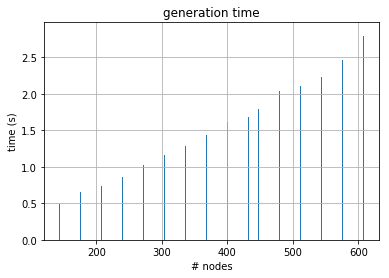

In [84]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(list(times.keys()), times.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('generation time')
plt.grid(True)
plt.show()

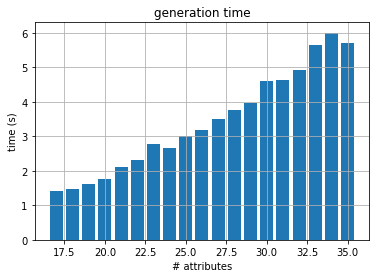

In [86]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(list(times.keys()), times.values(), align='center')

plt.xlabel('# attributes')
plt.ylabel('time (s)')
plt.title('generation time')
plt.grid(True)
plt.show()

In [19]:
def getwidth(tree):
  if tree.tb==None and tree.fb==None: return 1
  return getwidth(tree.tb)+getwidth(tree.fb)

def getdepth(tree):
  if tree.tb==None and tree.fb==None: return 0
  return max(getdepth(tree.tb),getdepth(tree.fb))+1


from PIL import Image,ImageDraw

def drawtree(tree,jpeg='tree.jpg'):
  w=getwidth(tree)*100
  h=getdepth(tree)*100+120

  img=Image.new('RGB',(w,h),(255,255,255))
  draw=ImageDraw.Draw(img)

  drawnode(draw,tree,w/2,20)
  img.save(jpeg,'JPEG')
  
def drawnode(draw,tree,x,y):
  if tree.results==None:
    # Get the width of each branch
    w1=getwidth(tree.fb)*100
    w2=getwidth(tree.tb)*100

    # Determine the total space required by this node
    left=x-(w1+w2)/2
    right=x+(w1+w2)/2

    # Draw the condition string
    draw.text((x-20,y-10),str(tree.col)+':'+str(tree.value),(0,0,0))

    # Draw links to the branches
    draw.line((x,y,left+w1/2,y+100),fill=(255,0,0))
    draw.line((x,y,right-w2/2,y+100),fill=(255,0,0))
    
    # Draw the branch nodes
    drawnode(draw,tree.fb,left+w1/2,y+100)
    drawnode(draw,tree.tb,right-w2/2,y+100)
  else:
    txt=' \n'.join(['%s:%d'%v for v in tree.results.items()])
    draw.text((x-20,y),txt,(0,0,0))

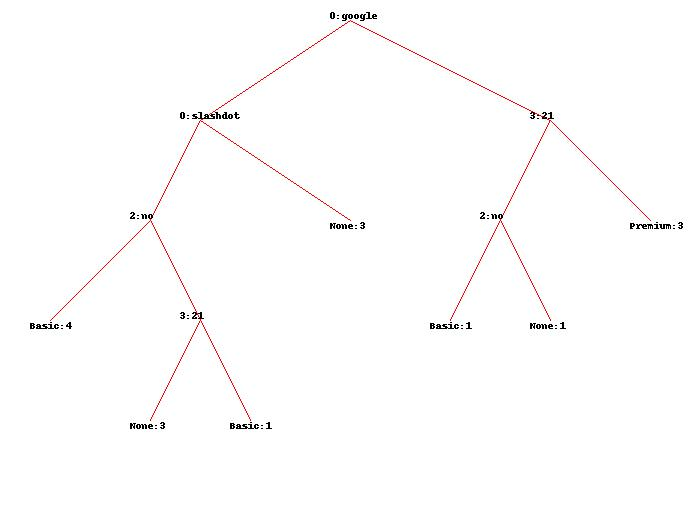

In [21]:
drawtree(tree,jpeg='treeview.jpg')
from IPython.display import Image 
Image(filename='treeview.jpg')